In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load data
spk_data = "D:\\code\\uom_explore\\data_science\\cleaned_df.csv"
data = pd.read_csv(spk_data)

# Save the channel_id column before dropping it
channel_id = data['channel_id']

# Drop columns
data = data.drop(columns=['experiment_id', 'channel_id'])

# Standardize data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply PCA
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_scaled)
data_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2', 'PC3'])

# Add channel_id back
data_pca['channel_id'] = channel_id
data_pca.head()


,PC1,PC2,PC3,channel_id
0,-3.767179,-1.640410,-0.037382,0
1,-3.824029,-0.476683,0.160333,1
2,-3.667458,-0.282967,0.089983,2
3,-3.611556,-0.485625,0.100564,3
4,9.486586,0.889987,0.220029,4


In [11]:
# plot the data in 3D with plotly and label each point with the channel_id
import plotly.express as px
fig = px.scatter_3d(data_pca, x='PC1', y='PC2', z='PC3', color='channel_id')
fig.show()

# T-SNE Dimension Reduction

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import plotly.express as px

# Load data
spk_data = "D:\\code\\uom_explore\\model_input\\feature_matrix_2.csv"
data = pd.read_csv(spk_data)

# Save the channel_id column before dropping it
channel_id = data['channel_id']

# Drop columns not needed for t-SNE
data = data.drop(columns=['experiment_id', 'channel_id'])

# Standardize data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply t-SNE
tsne = TSNE(n_components=3, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)
data_tsne = pd.DataFrame(data_tsne, columns=['TSNE1', 'TSNE2', 'TSNE3'])

# Add channel_id back
data_tsne['channel_id'] = channel_id

# Interactive 3D plot with Plotly
fig = px.scatter_3d(data_tsne, x='TSNE1', y='TSNE2', z='TSNE3', color='channel_id', title="3D t-SNE Visualization")
fig.show()


## Pairplot with Seaborn at higher dimensions

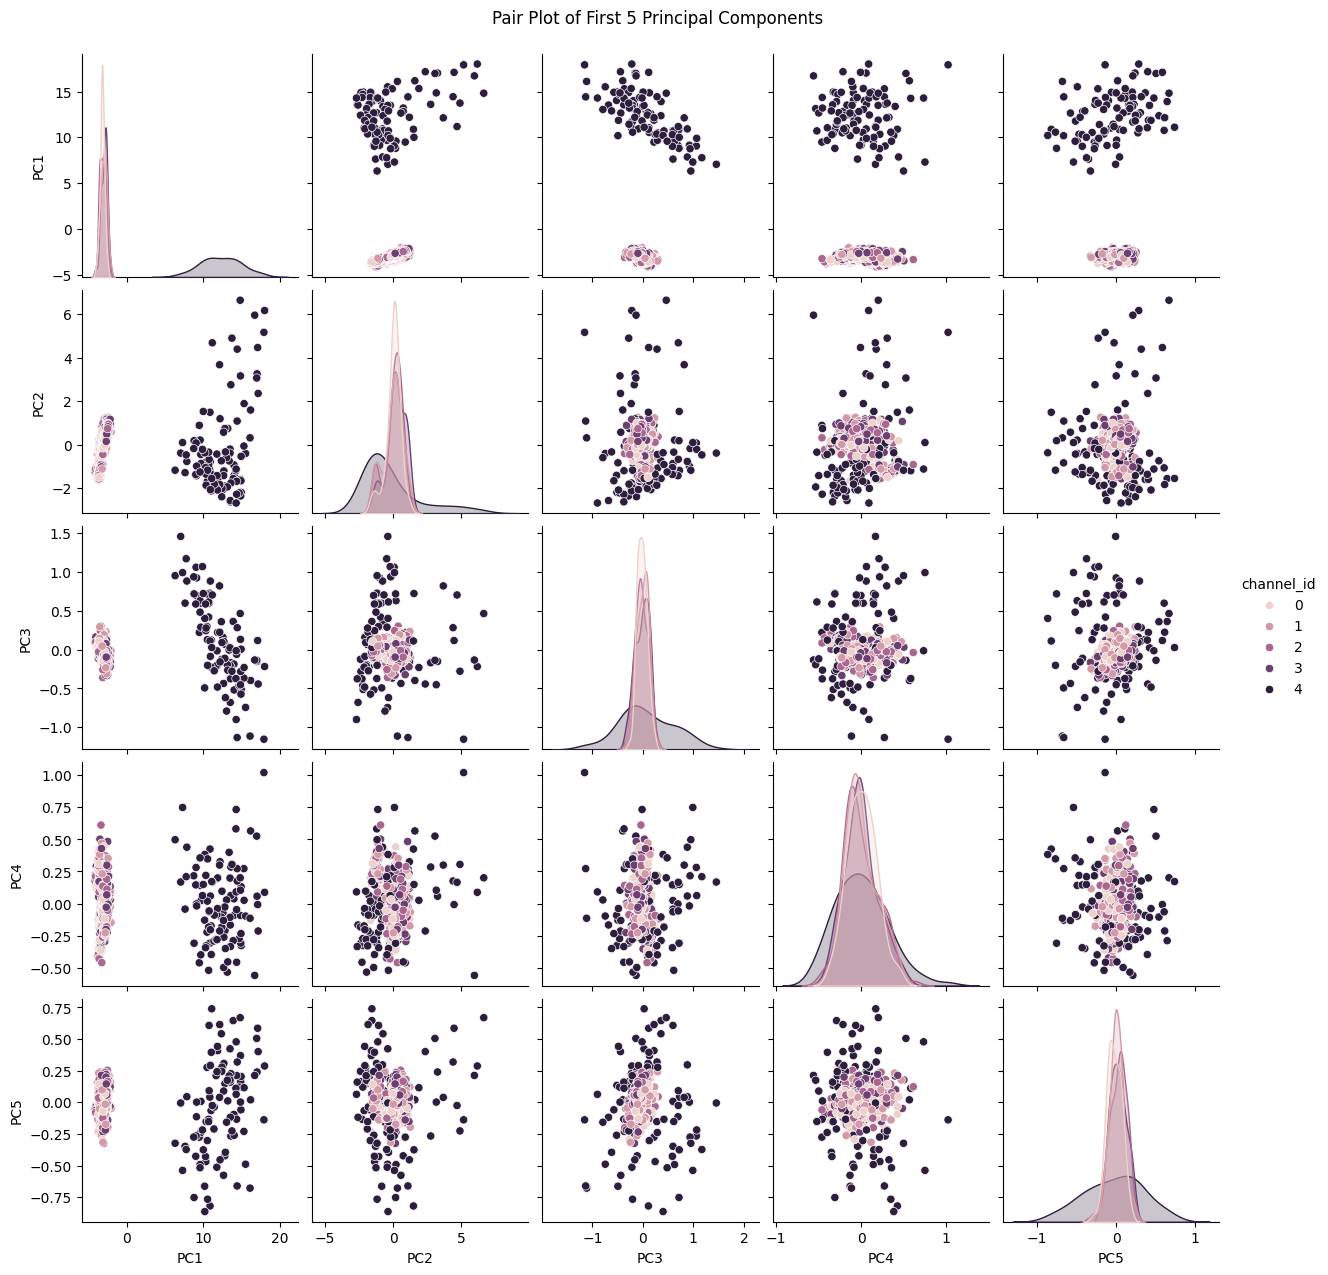

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
spk_data = "D:\\code\\uom_explore\\model_input\\feature_matrix_2.csv"
data = pd.read_csv(spk_data)

# Save the channel_id column before dropping it
channel_id = data['channel_id']

# Drop columns not needed for PCA
data = data.drop(columns=['experiment_id', 'channel_id'])

# Standardize data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply PCA
pca = PCA(n_components=5)  # Using 5 components
data_pca = pca.fit_transform(data_scaled)
data_pca = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(5)])
data_pca['channel_id'] = channel_id

# Create pair plot
sns.pairplot(data_pca, hue='channel_id', diag_kind='kde')
plt.suptitle("Pair Plot of First 5 Principal Components", y=1.02)
plt.show()
